In [1]:
%matplotlib inline

Gradient Descent
===============

This is the demo for gradient descent zigzag effect




Minimum point: [-1.52963335e-09 -3.90233301e-11]
F(W):  9.360635552127891e-18
Number of iterations: 20


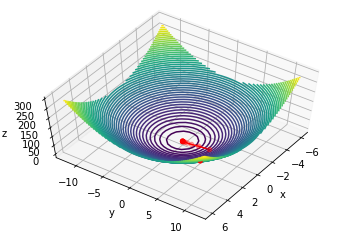

In [156]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

def compute_gradient(W):
    return np.array([8 * W[0], 2 * W[1]])

def f(W):
    return 4*W[0]**2 + W[1]**2
  
def update_Vanilla(W, grad, alpha, cache):
    #vanilla update
    return W - alpha * grad, cache
  
def update_Momentum(W, grad, alpha, cache):
    v, rho = cache
    v = rho * v + grad
    #print(v, rho)
    cache = v, rho
    return W - alpha * v, cache

def update_Adagrad(W, grad, alpha, cache):
    grad_squared = cache
    grad_squared += grad**2
    cache = grad_squared
    return W - alpha * grad/(np.sqrt(grad_squared) + 1e-7), cache

def update_RMSProp(W, grad, alpha, cache):
    grad_squared, decay_rate = cache
    grad_squared = decay_rate * grad_squared + (1 - decay_rate) * grad**2
    cache = grad_squared, decay_rate
    return W - alpha * grad/(np.sqrt(grad_squared) + 1e-7), cache

def update_Adam(W, grad, alpha, cache):
    first_moment, second_moment, beta1, beta2, t = cache
    
    first_moment = beta1 * first_moment + (1 - beta1) * grad
    second_moment = beta2 * second_moment + (1 - beta2) * grad **2
    
    first_unbias = first_moment / (1 - beta1 ** t)
    second_unbias = second_moment / (1 - beta2 ** t)
    
    cache = first_moment, second_moment, beta1, beta2, t + 1
    
    return W - alpha * first_unbias/(np.sqrt(second_unbias) + 1e-7), cache
  
w0_grid = np.linspace(-6, 6, 30)
w1_grid = np.linspace(-12, 12, 30)

W_grid = np.meshgrid(w0_grid, w1_grid)
Z = f(W_grid)

ax = plt.axes(projection='3d')
ax.contour3D(W_grid[0], W_grid[1], Z, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ax.view_init(60, 35)

W = np.array([5, 10])

trajectory = [np.append(W, f(W))]

tolerance = 10E-9
e = 1

#vanilla
# alpha = 0.22
# cache = 0
# update = update_Vanilla

#Momentum
# alpha = 0.22
# cache = (0, 0.15)
# update = update_Momentum

#Adagrad
# alpha = 15
# cache = np.array([0.0, 0.0])
# update = update_Adagrad

#RMSProb
alpha = 1.5
cache = np.array([0.0, 0.0]), 0.9
update = update_RMSProp

#Adam
# alpha = 2
# cache = np.array([0.0, 0.0]), np.array([0.0, 0.0]), 0.05, 0.95, 1
# update = update_Adam

while e > tolerance:
    grad = compute_gradient(W)
    
    W, cache = update(W, grad, alpha, cache)
    
    trajectory = np.append(trajectory, [np.append(W, f(W))], axis=0)
    e = np.amax(np.absolute(grad))

print("Minimum point:", W)
print("F(W): ", f(W))
print("Number of iterations: %d" % len(trajectory))

ax.scatter3D(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], c='red', cmap='Reds');
ax.plot3D(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], 'red')

plt.show()